**Jacob Wise, jmw555**

Over the years, data and technology have become increasingly intertwined with the world of sports. Sports analysts use data to make predictions about games, scouts use data to search for the best players for their team, Vegas uses data to create odds for sports betting, and videogames use it to simulate different plays and scenarios. My goal was to explore and analyze how machine learning models can be used to make predictions about NBA players' shots. For example, given some attributes, how well can we predict if a shot was made or not? How well can we distinguish between players based off the attributes of their shots?

To answer these questions, I looked at a dataset of all the shots taken by every player in the 2014-2015 NBA season. By honing in on certain data to train these models, I hope to find insightful results.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('shot_logs.csv')

In [3]:
df.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id'],
      dtype='object')

In [4]:
print("Length of the total dataframe before dropping null values:", len(df))
df = df.dropna()
print("Length of the total dataframe after dropping null values:", len(df))
df.head()

Length of the total dataframe before dropping null values: 128069
Length of the total dataframe after dropping null values: 122502


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,0,brian roberts,203148


The columns used in the models are already clean and don't require any manipulation for effective use, aside from dropping null values. Each model, though, used only the observations in the dataframe of certain players, and filtered different variables for fitting the model.

**KNeighbors - Lebron James**

Here we make a copy of the dataset with only shots taken by LeBron James, the most famous basketball player in the 2014-2015 season and arguably the best basketball player of all time. LeBron is a 6'9" athletic power forward, so he's typically one of the biggest players on the court and can take the ball to the hoop with power. By taking a look at the distribution of shot distance between his made shots and missed shots, and comparing them to that of all his shots, we can get a good sense of what type of player he is and his shooting ability.

LeBron shots dataframe length: 947


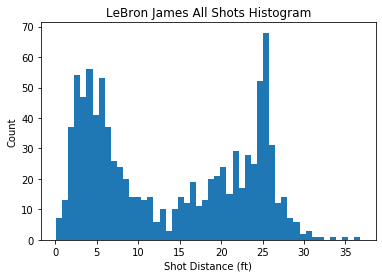

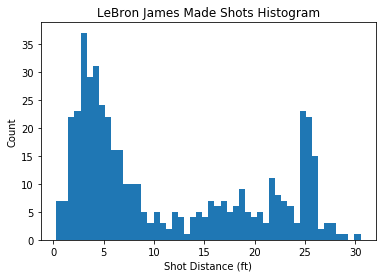

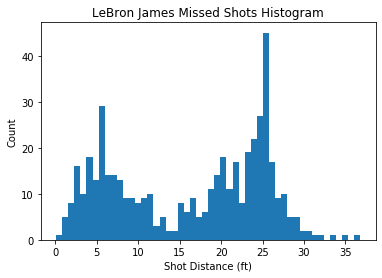

In [5]:
lebron = df.loc[df['player_name']=='lebron james']

print("LeBron shots dataframe length:", len(lebron))

plt.hist(lebron['SHOT_DIST'], bins=50)
plt.title('LeBron James All Shots Histogram')
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Count')
plt.show()

made = lebron[lebron['SHOT_RESULT'] == 'made']
missed = lebron[lebron['SHOT_RESULT'] == 'missed']

plt.hist(made['SHOT_DIST'], bins=50)
plt.title('LeBron James Made Shots Histogram')
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Count')
plt.show()

plt.hist(missed['SHOT_DIST'], bins=50)
plt.title('LeBron James Missed Shots Histogram')
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Count')
plt.show()

The first peak in each histogram consists of shots very close to the hoop, including layups and dunks. The second is 3-point shots. It appears LeBron doesn't shy away from 3-point shots, but is much more efficient in scoring from closer to the hoop, in the area called the paint. I decided to see how well the features of LeBron's shots can be used to predict whether he made or missed them. Here, I used a KNeighborsClassifier, and compared to the baseline default where every shot is missed.

In [6]:
X = lebron.filter(['SHOT_DIST', 'SHOT_CLOCK', 'CLOSE_DEF_DIST', 'DRIBBLES'])
y = lebron['SHOT_RESULT']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(100)

model.fit(x_train, y_train)

predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
# print(accuracy)

y_train.describe()
y_test.describe()
base_array = np.full(190, 'missed')

baseline = accuracy_score(y_test, base_array)
print('baseline:',baseline)

# # Compute the percent improvement from the baseline
improvement = (accuracy - baseline) / baseline
print('improvment:',improvement)

print('accuracy:', accuracy)

baseline: 0.4842105263157895
improvment: 0.3695652173913042
accuracy: 0.6631578947368421


After trying different combinations of features that I thought would impact the model, I found the highest accuracy to be with shot distance, shot clock time, closest defender distance, and number of dribbles. These are all factors that heavily influence the player's shot and its result. When using these features, the model predicts with over 66% accuracy whether a shot is made or missed. Although this isn't outstanding, a player with the skill level of LeBron James has a decent chance of making any shot he takes, so it would be extremely difficult to raise accuracy up to 90%, for example, in a case like this. Still, the results of his shots can be predicted correctly about 2/3 of the time. LeBron's coaching staff and himself can take this into account when practicing, designing plays, and making in-game shot decisions.

**KNeighbors - LeBron vs. Steph**

After looking at LeBron's data, I set out to explore how well machine learning models can distinguish between different players. LeBron has a very particular play style, so I wondered how his shots can be classified against those of a very different type of player. For example, Stephen Curry is a 6'3" point guard, and probably the best shooter in the history of the game. He revolutionized the importance of the 3-point shot, and can drain 3s from incredible range. In fact, he was voted the MVP of the NBA in this season, one of the highest honors a player can receive. To see the prevalence of the 3-point shot in Steph's game, we can look at the distribution of his shot distances side by side with LeBron's. We can also look at another feature, the shot clock time, to see that Steph typically shoots early on in his team's possessions, while LeBron manages the clock and takes shots pretty evenly throughout the range.

Steph shots dataframe length: 941


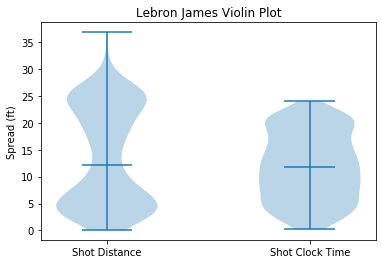

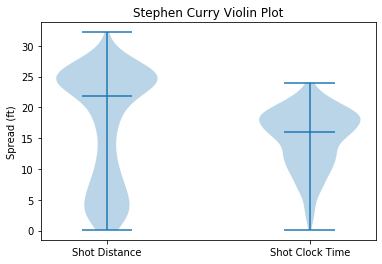

In [7]:
steph = df.loc[df['player_name']=='stephen curry']
print("Steph shots dataframe length:", len(steph))

plt.violinplot([lebron['SHOT_DIST'], lebron['SHOT_CLOCK']],showextrema=True,showmedians=True)

plt.title('Lebron James Violin Plot')
plt.xticks([1,2],['Shot Distance','Shot Clock Time'])
plt.ylabel('Spread (ft)')
plt.show()

plt.violinplot([steph['SHOT_DIST'], steph['SHOT_CLOCK']],showextrema=True,showmedians=True)

plt.title('Stephen Curry Violin Plot')
plt.xticks([1,2],['Shot Distance','Shot Clock Time'])
plt.ylabel('Spread (ft)')
plt.show()

I used the features above for the training data, and fit a KNeighborsClassifier to predict whether the shot was taken by LeBron or Steph.

In [8]:
df1 = pd.concat([lebron, steph])
print("Length of LeBron and Steph shot data:", len(df1))

X = df1.filter(['SHOT_DIST', 'SHOT_CLOCK'])
y = df1['player_name']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(100)

model.fit(x_train, y_train)

predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
# print(accuracy)

y_train.describe()
y_test.describe()
base_array = np.full(378, 'stephen curry')

baseline = accuracy_score(y_test, base_array)
print('\nbaseline:',baseline)

# # Compute the percent improvement from the baseline
improvement = (accuracy - baseline) / baseline
print('improvment:',improvement)

print('accuracy:', accuracy)

Length of LeBron and Steph shot data: 1888

baseline: 0.5026455026455027
improvment: 0.44210526315789467
accuracy: 0.7248677248677249


The classifier can predict with about 72% accuracy which of the two players took a shot. For videogames where the results of players' actions are determined by models such as this, 72% is a solid threshold to distinguish between the two players and allow their characters to play more like them. It's possible the model would perform better on two players who are even more different than LeBron and Steph. LeBron and Steph are two of the best players in the league, and are both skilled enough to make shots from many areas on the court, even while defended. If we take Steph and, let's say, Kendrick Perkins (a center who doesn't specialize in shooting or scoring), the model might have a higher accuracy.

**KNeighbors - Kendrick vs. Steph**

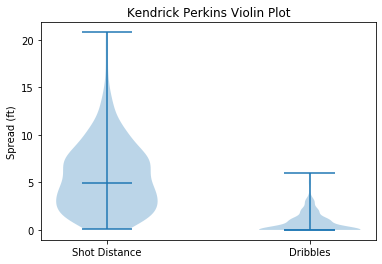

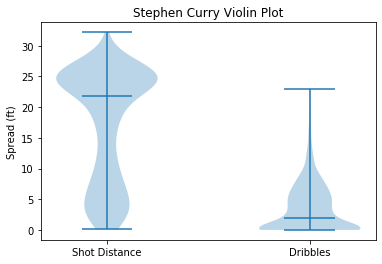

In [9]:
kendrick = df.loc[df['player_name']=='kendrick perkins']

plt.violinplot([kendrick['SHOT_DIST'], kendrick['DRIBBLES']],showextrema=True,showmedians=True)

plt.title('Kendrick Perkins Violin Plot')
plt.xticks([1,2],['Shot Distance','Dribbles'])
plt.ylabel('Spread (ft)')
plt.show()

plt.violinplot([steph['SHOT_DIST'], steph['DRIBBLES']],showextrema=True,showmedians=True)

plt.title('Stephen Curry Violin Plot')
plt.xticks([1,2],['Shot Distance','Dribbles'])
plt.ylabel('Spread (ft)')
plt.show()

Unlike LeBron's, Kendrick's shot distance distribution doesn't have much of a second peak, and has no peak at all at the 3-point mark of around 25 feet. His play style is even more distinguished from Steph's, so the classifier may score even higher.

In [10]:
df_ = pd.concat([kendrick, steph])
print("Length of Kendrick and Steph shot data:", len(df_))

X = df_.filter(['SHOT_DIST', 'DRIBBLES'])
y = df_['player_name']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(100)

model.fit(x_train, y_train)

predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)

y_train.describe()
y_test.describe()
base_array = np.full(227, 'stephen curry')

baseline = accuracy_score(y_test, base_array)
print('\nbaseline:',baseline)

# # Compute the percent improvement from the baseline
improvement = (accuracy - baseline) / baseline
print('improvment:',improvement)

print('accuracy:', accuracy)

Length of Kendrick and Steph shot data: 1131

baseline: 0.8281938325991189
improvment: 0.0638297872340425
accuracy: 0.8810572687224669


As expected, the classifier performs much better for the dataset with Kendrick and Steph's shots. The accuracy score reaches over 88%.

**Decision Tree Classifiers**

After the KNeighbors classifiers, I decided to see if another model could better distinguish between the shots of two players. I performed Decision Tree Classifiers on the shots of Kendrick and Steph (using shot distances and dribbles), and then LeBron and Steph (using shot distance and shot clock time). Although accuracy scores decreased (to 83.7% and 62.1%, respectively), it was interesting to visualize how the model makes decision to classify the data.

Accuracy for Kendrick vs. Steph: 0.8370044052863436


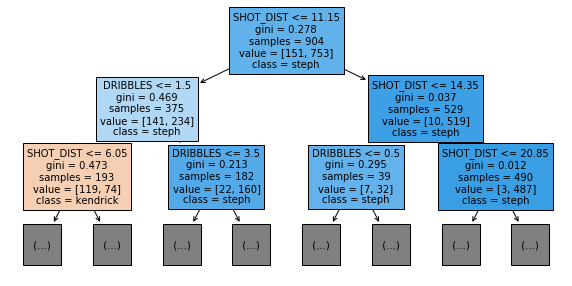

In [11]:
from sklearn import tree
X = df_.filter(['SHOT_DIST', 'DRIBBLES'])
y = df_['player_name']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print("Accuracy for Kendrick vs. Steph:", accuracy_score(preds, y_test))

plt.figure(figsize=(10,5))
tree.plot_tree(clf, max_depth=2, feature_names=x_test.columns, class_names=['kendrick', 'steph'], fontsize=10, filled=True);

Accuracy for LeBron vs. Steph: 0.6296296296296297


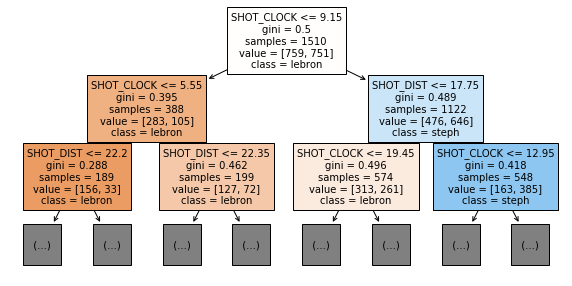

In [12]:
from sklearn import tree
X = df1.filter(['SHOT_DIST', 'SHOT_CLOCK'])
y = df1['player_name']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print("Accuracy for LeBron vs. Steph:", accuracy_score(preds, y_test))

plt.figure(figsize=(10,5))
tree.plot_tree(clf, max_depth=2, feature_names=x_test.columns, class_names=['lebron', 'steph'], fontsize=10, filled=True);

Using attributes such as shot distance, closest defender distance, dribbles, and shot clock time, I was able to run different models to classify shots as made or missed, and as taken by one player or another. The KNeighbors Classifiers generally performed better than the Decision Tree Classifiers, but all models scored an accuracy of at least 60%. For coaching, game-time decisions, and technological uses such as simulated basketball video games, these insights have much value. Understanding how different athletes play and how they perform their best is a key to basketball and sports in general, on both the offense and defensive sides.

*Data Source:* https://data.world/rezabr/nba-shot-logs-2015